**1. Kütüphaneleri İçe Aktarma**

In [58]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings


Bu adımda projede kullanacağımız gerekli Python kütüphanelerini içe aktarıyoruz:

* pandas: Veri analizinde ve veri  
manipülasyonunda kullanılır.
* train_test_split: Veriyi eğitim ve test olarak ayırır.
* StandardScaler: Veriyi normalize eder (özelliklerin aynı ölçeğe getirilmesi).
* classification_report, confusion_matrix: Model performansını değerlendirmek için kullanılır.
* SMOTE: Dengesiz veri kümelerini dengelemek için kullanılan bir yöntemdir.
* MultinomialNB, SVC, DecisionTreeClassifier, RandomForestClassifier: Farklı makine öğrenmesi sınıflandırma algoritmalarıdır.

**2. Veri Kümesini Okuma**


In [60]:
# Veri kümesini okuma (her bir dosyadan 20k satır alarak)
df1 = pd.read_csv('GooglePayIndia.csv', nrows=20000)
df2 = pd.read_csv('PaytmIndia.csv', nrows=20000)
df3 = pd.read_csv('PhonePayIndia.csv', nrows=20000)

Bu adımda üç farklı veri setini okuyoruz ve her birinden sadece ilk 20.000 satırı alıyoruz. Bu, bellek yönetimini daha verimli hale getirmemizi sağlar.

**3. Veri Kümesini Birleştirme**

In [61]:
# Üç veri kümesini birleştirerek tek bir veri çerçevesi oluşturma
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
df_combined.to_csv('main_dataset.csv', index=False)
df = pd.read_csv('main_dataset.csv')

Üç farklı veri setini birleştiriyoruz ve tek bir veri çerçevesi (DataFrame) haline getiriyoruz. Sonuçta oluşan bu veri setini main_dataset.csv olarak kaydediyoruz. Bu adım, farklı kaynaklardan gelen verileri tek bir yerde toplamak ve analiz yapmak için gereklidir.

**4. Gereksiz Sütunları Kaldırma**

In [62]:
df = df.drop(columns=['Unnamed: 0', 'reviewId', 'userImage', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt'])

* drop(): Pandas veri çerçevesinden (DataFrame) belirli sütunları veya satırları kaldırmak için kullanılan bir fonksiyondur.
* columns parametresi: Kaldırılacak sütunların isimlerini belirtilir.

**5. Eksik Verileri Kontrol Etme**

In [63]:
# Eksik verileri kontrol etme
print("\nEksik Veriler:")
print(df.head(10))
print(df.isnull().sum())


Eksik Veriler:
           userName                                            content  score  \
0        Len Pagnam   How do add a boarding pass? I see no passes tab.      1   
1    Benjamin Silva                                               Best      5   
2      PARVESH MIAR                                             All ok      5   
3          Mikko L.  Rasy to use really... But there never, ever sh...      3   
4     A Google user  I still do not understand why your restricting...      3   
5       Penny Smith  Keeps disappearing from home page. Very disapp...      2   
6  Jevgeni Litvinov  No ticket/transport support for Europe. Also n...      4   
7       Robin Cramp  App is now working for me as expected. Google ...      5   
8  Matthew Chandler                                               Good      5   
9           Nadia H  whether it works is a matter of luck. detect v...      1   

   thumbsUpCount  
0              0  
1              0  
2              0  
3              0

* df_combined.isnull().sum() Veri setinde eksik değer olup olmadığını kontrol etmek için bu kodu kullanıyoruz. Her sütundaki eksik değerlerin sayısını döndürür. Eğer eksik veri varsa, bunu düzeltmek için ileride çeşitli stratejiler uygulayabiliriz.

**6. Eksik Verileri Kaldırma**

In [64]:
df = df.dropna(subset=['content'])

* Eksik verileri içeren satırları veri setinden çıkartıyoruz. Bu adım, makine öğrenmesi modelleri eksik veri ile çalışmakta zorlandığı için gerekli olabilir.

**7. Temizlenmiş Veri Görüntüleme**

In [65]:
# Temizlenmiş veri kümesinin ilk 10 satırını görüntüleme
print("\nTemizlenmiş Veri (İlk 10 Satır):")
print(df.head(10))


Temizlenmiş Veri (İlk 10 Satır):
           userName                                            content  score  \
0        Len Pagnam   How do add a boarding pass? I see no passes tab.      1   
1    Benjamin Silva                                               Best      5   
2      PARVESH MIAR                                             All ok      5   
3          Mikko L.  Rasy to use really... But there never, ever sh...      3   
4     A Google user  I still do not understand why your restricting...      3   
5       Penny Smith  Keeps disappearing from home page. Very disapp...      2   
6  Jevgeni Litvinov  No ticket/transport support for Europe. Also n...      4   
7       Robin Cramp  App is now working for me as expected. Google ...      5   
8  Matthew Chandler                                               Good      5   
9           Nadia H  whether it works is a matter of luck. detect v...      1   

   thumbsUpCount  
0              0  
1              0  
2              0 

**8. Puan Dağılımını Görselleştirme**

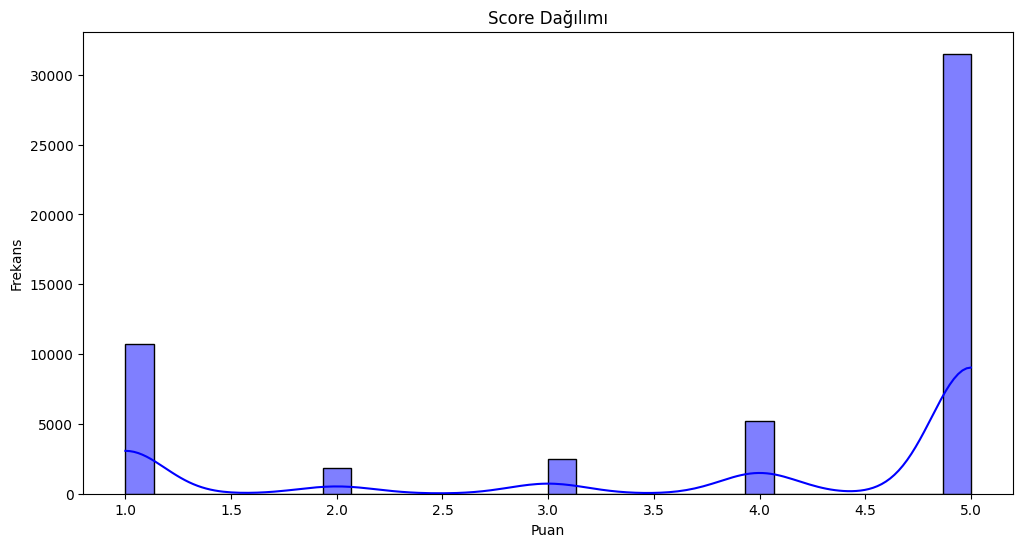

In [66]:
# Puanların dağılımını görselleştirme
plt.figure(figsize=(12, 6))
sns.histplot(df['score'], kde=True, bins=30, color='blue')
plt.title('Score Dağılımı')
plt.xlabel('Puan')
plt.ylabel('Frekans')
plt.show()

**9. Korelasyon Matrisi**

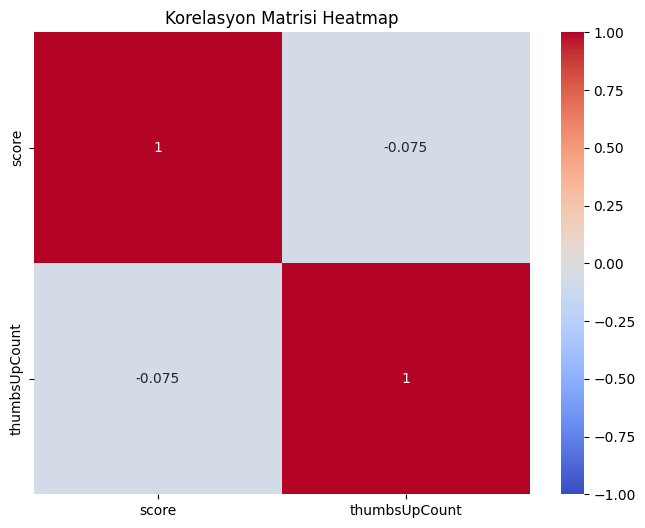

In [67]:
# Korelasyon matrisini hesaplayıp görselleştirme
plt.figure(figsize=(8, 6))
corr_matrix = df[['score', 'thumbsUpCount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi Heatmap')
plt.show()

**10. Özellikler ve Hedef Değişken Belirleme**

In [68]:
# Özellikler (X) ve hedef değişken (y) belirleme
X = df[['score', 'thumbsUpCount']]
y = df['score']

**11. Medyan ile Sınıflara Ayırma**

In [75]:
# Medyanı kullanarak iki sınıfa ayırma
df['score_class'] = (df['score'] > df['score'].median()).astype(int)
score_distribution = df['score_class'].value_counts()
print("\nSınıf Dağılımı:")
print(score_distribution)


Sınıf Dağılımı:
score_class
0    51737
Name: count, dtype: int64


**12. Eğitim ve Test Setlerine Ayırma**

In [70]:
# Eğitim ve test setlerine ayırma (sınıflandırma)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, df['score_class'], test_size=0.2, random_state=42)

* train_test_split: Veriyi %80 eğitim ve %20 test olarak ikiye böler.



**13. Özelliklerin Ölçeklenmesi**

In [76]:
# Özelliklerin ölçeklenmesi
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

* StandardScaler: Veriyi normalize ederek her bir özelliğin ortalamasını 0, standart sapmasını 1 yapar. Bu işlem, birçok makine öğrenmesi modelinde modelin daha iyi öğrenmesini sağlar.

**14. SMOTE Kontrolü ve Uygulama**

In [72]:
# Sınıf dengesizliği kontrolü ve SMOTE kullanımı
print("\nEğitim Setindeki Sınıf Dağılımı:")
print(pd.Series(y_train_class).value_counts())

# Eğer sınıflardan sadece biri varsa, SMOTE uygulanamaz
if len(np.unique(y_train_class)) > 1:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_class_scaled, y_train_class)
else:
    print("Eğitim setinde yalnızca bir sınıf var. SMOTE uygulanamaz.")
    X_resampled, y_resampled = X_train_class_scaled, y_train_class


Eğitim Setindeki Sınıf Dağılımı:
score_class
0    41389
Name: count, dtype: int64
Eğitim setinde yalnızca bir sınıf var. SMOTE uygulanamaz.


* SMOTE: Eğer verinizde bir sınıfın sayısı diğerlerinden çok azsa, SMOTE yöntemiyle o az olan sınıf için sentetik (yapay) veriler oluşturulur. Bu, modelin tüm sınıfları daha dengeli öğrenmesini sağlar.

**15. Model Tanımlama**

In [77]:
# Model tanımlama
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

Bu adımda, dört farklı makine öğrenmesi sınıflandırma modeli kullanılıyor:

* Naive Bayes: Genellikle metin sınıflandırma gibi veri setlerinde kullanılır. Ancak, negatif veya sıfır değerlerle çalışamaz. Bu nedenle, veri setinde negatif değerler varsa bu model hata verebilir.
* SVM (Support Vector Machines): Karmaşık verilerde iyi performans gösteren güçlü bir sınıflandırma algoritmasıdır. Ancak verideki sınıf sayısının yetersizliği gibi durumlarda hata verebilir.
* Karar Ağacı (Decision Tree): Verinin özelliklerine göre dallar oluşturarak sınıflandırma yapar. Karar ağaçları hızlıdır, ancak aşırı öğrenme (overfitting) riski taşır.
* Rastgele Orman (Random Forest): Birden fazla karar ağacı oluşturup, bu ağaçlardan alınan sonuçları birleştirerek nihai sınıflandırmayı yapar. Daha sağlam sonuçlar üretir ve genellikle karar ağaçlarına göre daha az overfitting yapar.

**16. Modelleri Eğitim ve Değerlendirme**

In [74]:
# Modelleri eğitim ve değerlendirme
for name, model in models.items():
    try:
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test_class_scaled)

        # Model sonuçlarını görüntüleme
        print(f"\n{name} Model Sonuçları:")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test_class, y_pred))
        print("Classification Report:")
        print(classification_report(y_test_class, y_pred))

        # Ek değerlendirme metrikleri
        mae = mean_absolute_error(y_test_class, y_pred)
        mse = mean_squared_error(y_test_class, y_pred)
        r2 = r2_score(y_test_class, y_pred)

        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"R-squared (R²): {r2:.4f}")
    except ValueError as e:
        print(f"{name} Modelinde Hata: {e}")

Naive Bayes Modelinde Hata: Negative values in data passed to MultinomialNB (input X)
SVM Modelinde Hata: The number of classes has to be greater than one; got 1 class

Decision Tree Model Sonuçları:
Confusion Matrix:
[[10348]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10348

    accuracy                           1.00     10348
   macro avg       1.00      1.00      1.00     10348
weighted avg       1.00      1.00      1.00     10348

Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
R-squared (R²): 1.0000

Random Forest Model Sonuçları:
Confusion Matrix:
[[10348]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10348

    accuracy                           1.00     10348
   macro avg       1.00      1.00      1.00     10348
weighted avg       1.00      1.00      1.00     10348

Mean Absolute Error (MAE): 0.0

* Bu adımda, farklı makine öğrenmesi modelleri eğitilir ve performansları değerlendirilir.
* model.fit: Modeli dengelenmiş eğitim verileriyle eğitir (SMOTE ile üretilen veriler).
* model.predict: Modelin test verileri üzerindeki tahminlerini alır.
* confusion_matrix: Modelin doğruluğunu ölçmek için kullanılan bir tablo. Bu tabloda, doğru ve yanlış tahminler gösterilir.
* classification_report: Precision, Recall, F1-score gibi performans metriklerini verir.

Confusion Matrix (Karmaşıklık Matrisi) 4 alt başlığı vardır:
 * True Positive (Doğru Pozitif): Modelin doğru olarak pozitif sınıfa atadığı örnekler.
 * True Negative (Doğru Negatif): Modelin doğru olarak negatif sınıfa atadığı örnekler.
 * False Positive (Yanlış Pozitif): Negatif sınıfa ait olup model tarafından yanlışlıkla pozitif sınıfa atanan örnekler.
 * False Negative (Yanlış Negatif): Pozitif sınıfa ait olup model tarafından yanlışlıkla negatif sınıfa atanan örnekler.


Classification Report (Sınıflandırma Raporu): Modelin performansını çeşitli metriklerle özetler:
 * Precision: Modelin pozitif tahminlerinden kaçının doğru olduğunu gösterir.
 * Recall: Pozitif sınıfa ait tüm veriler arasında modelin ne kadarını doğru sınıflandırdığını gösterir.
 * F1-Score: Precision ve Recall'ün harmonik ortalaması. Genel performansı gösterir.

TESTLER
* MAE ve MSE değerlerinin 0 olması, modelinizin test setindeki tahminlerinin tamamının doğru olduğunu gösterir. Bu, modelin sadece bir sınıf (örneğin, tüm tahminler 0) tahmin etmesi durumunda da gerçekleşebilir.
* R², modelin ne kadar iyi bir uyum sağladığını gösterir ve genellikle regresyon problemleri için kullanılır, ama sınıflandırma için de modelin genel performansını değerlendirmek açısından faydalı olabilir.